<div class="alert alert-block alert-warning">

<h1>Hotel Reservation</h1>
    
<a href="https://www.kaggle.com/datasets/779de8cc626fb0c43e6083e957a3a045463962637600765c74dd400a268430d3?resource=download">Kaggle Link</a>

    
<h2>About Dataset</h2>
<p>Context</p>
<blockquote>
The online hotel reservation channels have dramatically changed booking possibilities and customers’ behavior. A significant number of hotel reservations are called-off due to cancellations or no-shows. The typical reasons for cancellations include <strong>change of plans, scheduling conflicts, etc</strong>. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with.
</blockquote>

<p>Can you predict if the customer is going to honor the reservation or cancel it ?</p>
</div>

<hr>

<div class="alert alert-block alert-info">
    <h2>Columns</h2>
    <p><strong>Booking_ID:</strong> unique identifier of each booking.</p>
    <p><strong>no_of_adults:</strong> Number of Adults.</p>
    <p><strong>no_of_children:</strong> Number of Children.</p>
    <p><strong>no_of_weekend_nights:</strong> Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.</p>
    <p><strong>no_of_week_nights:</strong> Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.</p>
    <p><strong>type_of_meal_plan:</strong> Type of meal plan booked by the customer.</p>
    <p><strong>required_car_parking_space:</strong> Does the customer require a car parking space?</p>
    <p><strong>room_type_reserved:</strong> Type of room reserved by the customer.</p>
    <p><strong>lead_time:</strong> Number of days between the date of booking and the arrival date.</p>
    <p><strong>arrival_year:</strong> Year of arrival date.</p>
    <p><strong>arrival_month:</strong> Month of arrival date.</p>
    <p><strong>arrival_date:</strong> Date of the month.</p>
    <p><strong>market_segment_type:</strong> Market segment designation.</p>
    <p><strong>repeated_guest:</strong> Is the customer a repeated guest?</p>
    <p><strong>no_of_previous_cancellations:</strong> Number of previous bookings that were canceled by the customer prior to the current booking.</p>
    <p><strong>no_of_previous_bookings_not_canceled:</strong> Number of previous bookings not canceled by the customer prior to the current booking.</p>
    <p><strong>avg_price_per_room:</strong> Average price per day of the reservation; prices of the rooms are dynamic.</p>
    <p><strong>no_of_special_requests:</strong> Total number of special requests made by the customer.</p>
    <p><strong>booking_status:</strong> Flag indicating if the booking was canceled or not.</p>
</div>

## Importing Libraries and Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Hotel Reservations.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


## Explore Data Analysis

In [3]:
df.drop('Booking_ID',axis = 1,inplace = True)

In [4]:
df.booking_status = df.booking_status.apply(lambda x: 1 if x == 'Not_Canceled' else 0)

In [5]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          36275 non-null  int64  
 1   no_of_children                        36275 non-null  int64  
 2   no_of_weekend_nights                  36275 non-null  int64  
 3   no_of_week_nights                     36275 non-null  int64  
 4   type_of_meal_plan                     36275 non-null  object 
 5   required_car_parking_space            36275 non-null  int64  
 6   room_type_reserved                    36275 non-null  object 
 7   lead_time                             36275 non-null  int64  
 8   arrival_year                          36275 non-null  int64  
 9   arrival_month                         36275 non-null  int64  
 10  arrival_date                          36275 non-null  int64  
 11  market_segment_

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_adults,36275.0,1.844962,0.518715,0.0,2.0,2.00,2.0,4.0
no_of_children,36275.0,0.105279,0.402648,0.0,0.0,0.00,0.0,10.0
no_of_weekend_nights,36275.0,0.810724,0.870644,0.0,0.0,1.00,2.0,7.0
no_of_week_nights,36275.0,2.204300,1.410905,0.0,1.0,2.00,3.0,17.0
required_car_parking_space,36275.0,0.030986,0.173281,0.0,0.0,0.00,0.0,1.0
lead_time,36275.0,85.232557,85.930817,0.0,17.0,57.00,126.0,443.0
arrival_year,36275.0,2017.820427,0.383836,2017.0,2018.0,2018.00,2018.0,2018.0
arrival_month,36275.0,7.423653,3.069894,1.0,5.0,8.00,10.0,12.0
arrival_date,36275.0,15.596995,8.740447,1.0,8.0,16.00,23.0,31.0
repeated_guest,36275.0,0.025637,0.158053,0.0,0.0,0.00,0.0,1.0


In [8]:
df.query('no_of_adults == 0 & no_of_children == 0')

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


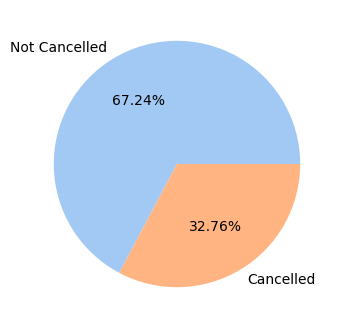

In [9]:
plt.figure(figsize = (4,4))
colors = sns.color_palette('pastel')[0:2]
plt.pie(df['booking_status'].value_counts(),labels = ['Not Cancelled','Cancelled'],colors = colors,autopct = '%.2f%%')
plt.show()

In [10]:
df.corr()['booking_status'].sort_values(ascending=False)[1:]

no_of_special_requests                  0.253070
repeated_guest                          0.107287
required_car_parking_space              0.086185
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
arrival_month                           0.011233
arrival_date                           -0.010629
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_adults                           -0.086920
no_of_week_nights                      -0.092996
avg_price_per_room                     -0.142569
arrival_year                           -0.179529
lead_time                              -0.438538
Name: booking_status, dtype: float64

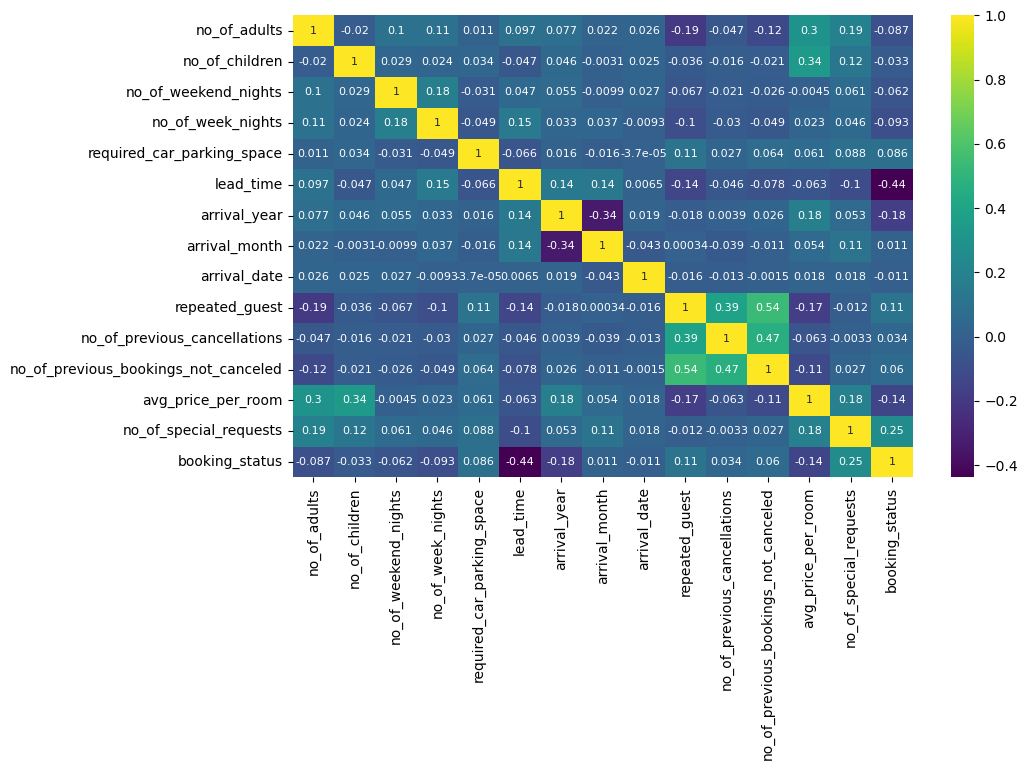

In [35]:
plt.figure(figsize = (10,6))
sns.heatmap(df.corr(),annot = True,annot_kws ={'size':8},cmap = 'viridis')
plt.show()

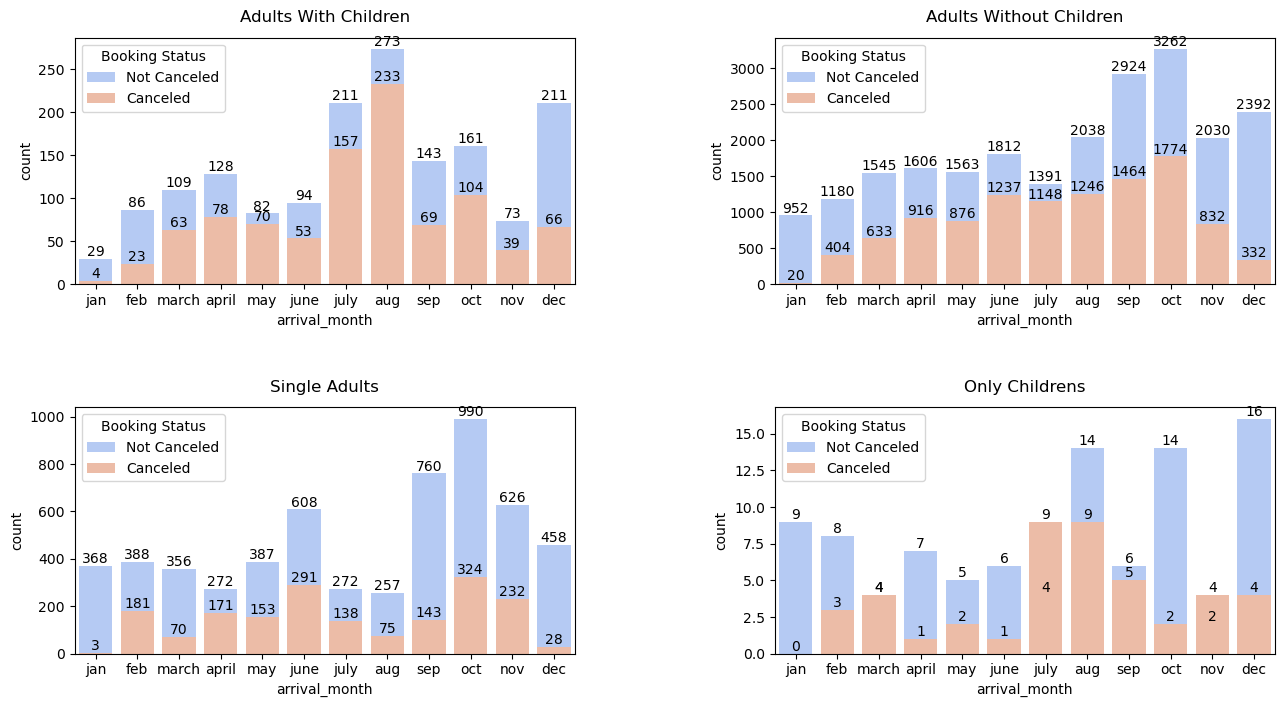

In [271]:
plt.figure(figsize= (15,8))
months = ['jan','feb','march','april','may','june','july','aug','sep','oct','nov','dec']
titles = [
    'Adults With Children',
    'Adults Without Children',
    'Single Adults',
    'Only Childrens'
]
queries = [
    'no_of_adults != 0 & no_of_children != 0',
    'no_of_adults != 0 & no_of_children ==0',
    'no_of_adults == 1 & no_of_children ==0',
    'no_of_adults == 0 & no_of_children !=0'
]
for i,q in enumerate(queries):
    plt.subplot(2,2,i+1)
    ax = sns.countplot(data = df.query(q),x = 'arrival_month',hue = 'booking_status',hue_order=[1,0],palette = 'coolwarm',dodge = False)
    ax.bar_label(ax.containers[0],size = 10)
    ax.bar_label(ax.containers[1],size = 10)
    plt.legend(['Not Canceled','Canceled'],loc = 'upper left',title = 'Booking Status')
    plt.xticks(ticks = np.arange(0,12),labels = months)
    plt.title(titles[i],y = 1.03)

plt.subplots_adjust(left = 0.1,right=0.9,wspace=0.4,hspace=0.5)
plt.show()

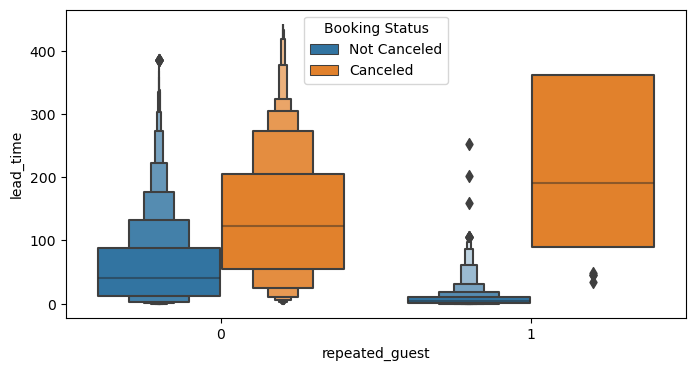

In [447]:
plt.figure(figsize = (8,4))
ax = sns.boxenplot(x = 'repeated_guest',y = 'lead_time',data = df,hue = 'booking_status',hue_order = [1,0])
plt.legend(loc = 'upper center')
ax.legend_.texts[0].set_text('Not Canceled')
ax.legend_.texts[1].set_text('Canceled')
ax.legend_.set_title('Booking Status')

In [421]:
def boxplot(x,y,xlabel,ylabel):
    ax = sns.boxplot(x = x,y= y,hue = 'booking_status',hue_order = [1,0],data = df,palette = 'coolwarm')
    plt.legend(loc = 'upper right')
    ax.legend_.texts[0].set_text('Not Canceled')
    ax.legend_.texts[1].set_text('Canceled')
    ax.legend_.set_title('Booking Status')
    plt.xlabel(xlabel,labelpad = 12,size = 12)
    plt.ylabel(ylabel,labelpad = 12,size = 12)

In [426]:
def countplot(x,xlabel,order):
    ax = sns.countplot(x = x,data = df,hue = 'booking_status',hue_order = [1,0],order = order,palette = 'coolwarm')
    ax.bar_label(ax.containers[0],size = 10)
    ax.bar_label(ax.containers[1],size = 10)
    plt.legend(['Not Canceled','Canceled'],loc = 'upper right',title = 'Booking Status') 
    plt.xlabel(xlabel,labelpad = 12,size = 12)
    plt.ylabel('Count',labelpad = 12,size = 12)

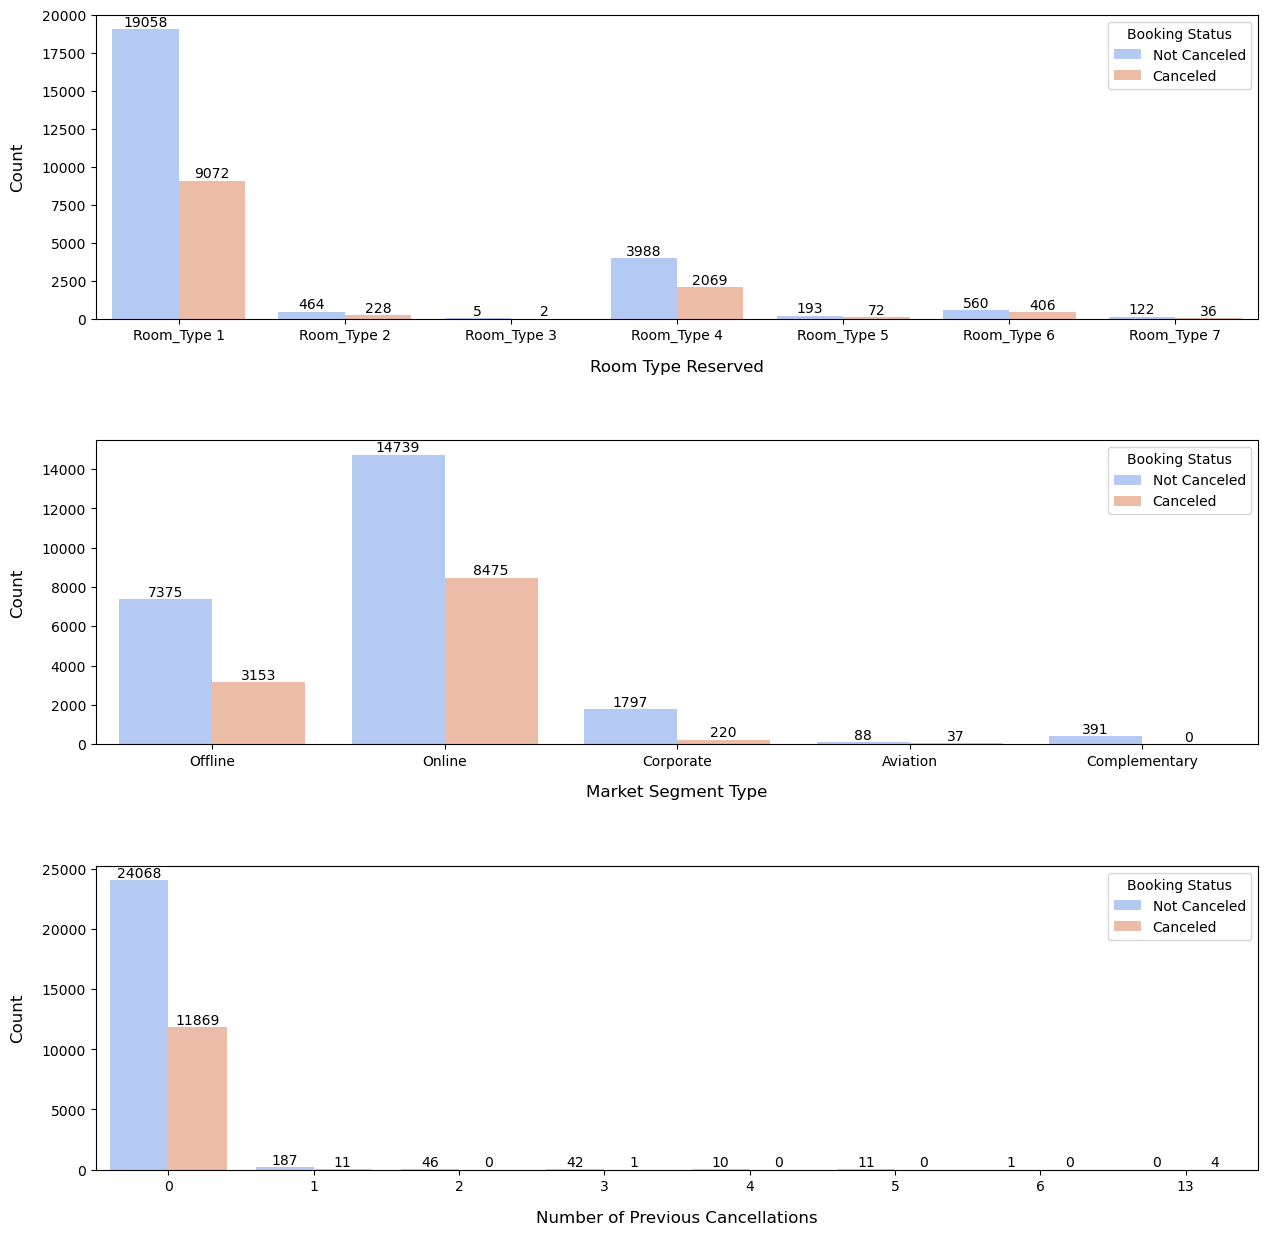

In [427]:
plt.figure(figsize = (15,15))

plt.subplot(3,1,1)
room_order = ['Room_Type 1','Room_Type 2','Room_Type 3','Room_Type 4','Room_Type 5','Room_Type 6','Room_Type 7']
countplot(x = 'room_type_reserved',xlabel = 'Room Type Reserved',order = room_order)

plt.subplot(3,1,2)
countplot(x = 'market_segment_type',xlabel = 'Market Segment Type',order = list(df.market_segment_type.unique()))

plt.subplot(3,1,3)
countplot(x = 'no_of_previous_cancellations',xlabel = 'Number of Previous Cancellations',order = [0,1,2,3,4,5,6,13])

plt.subplots_adjust(wspace = 0.4,hspace = 0.4)
plt.show()

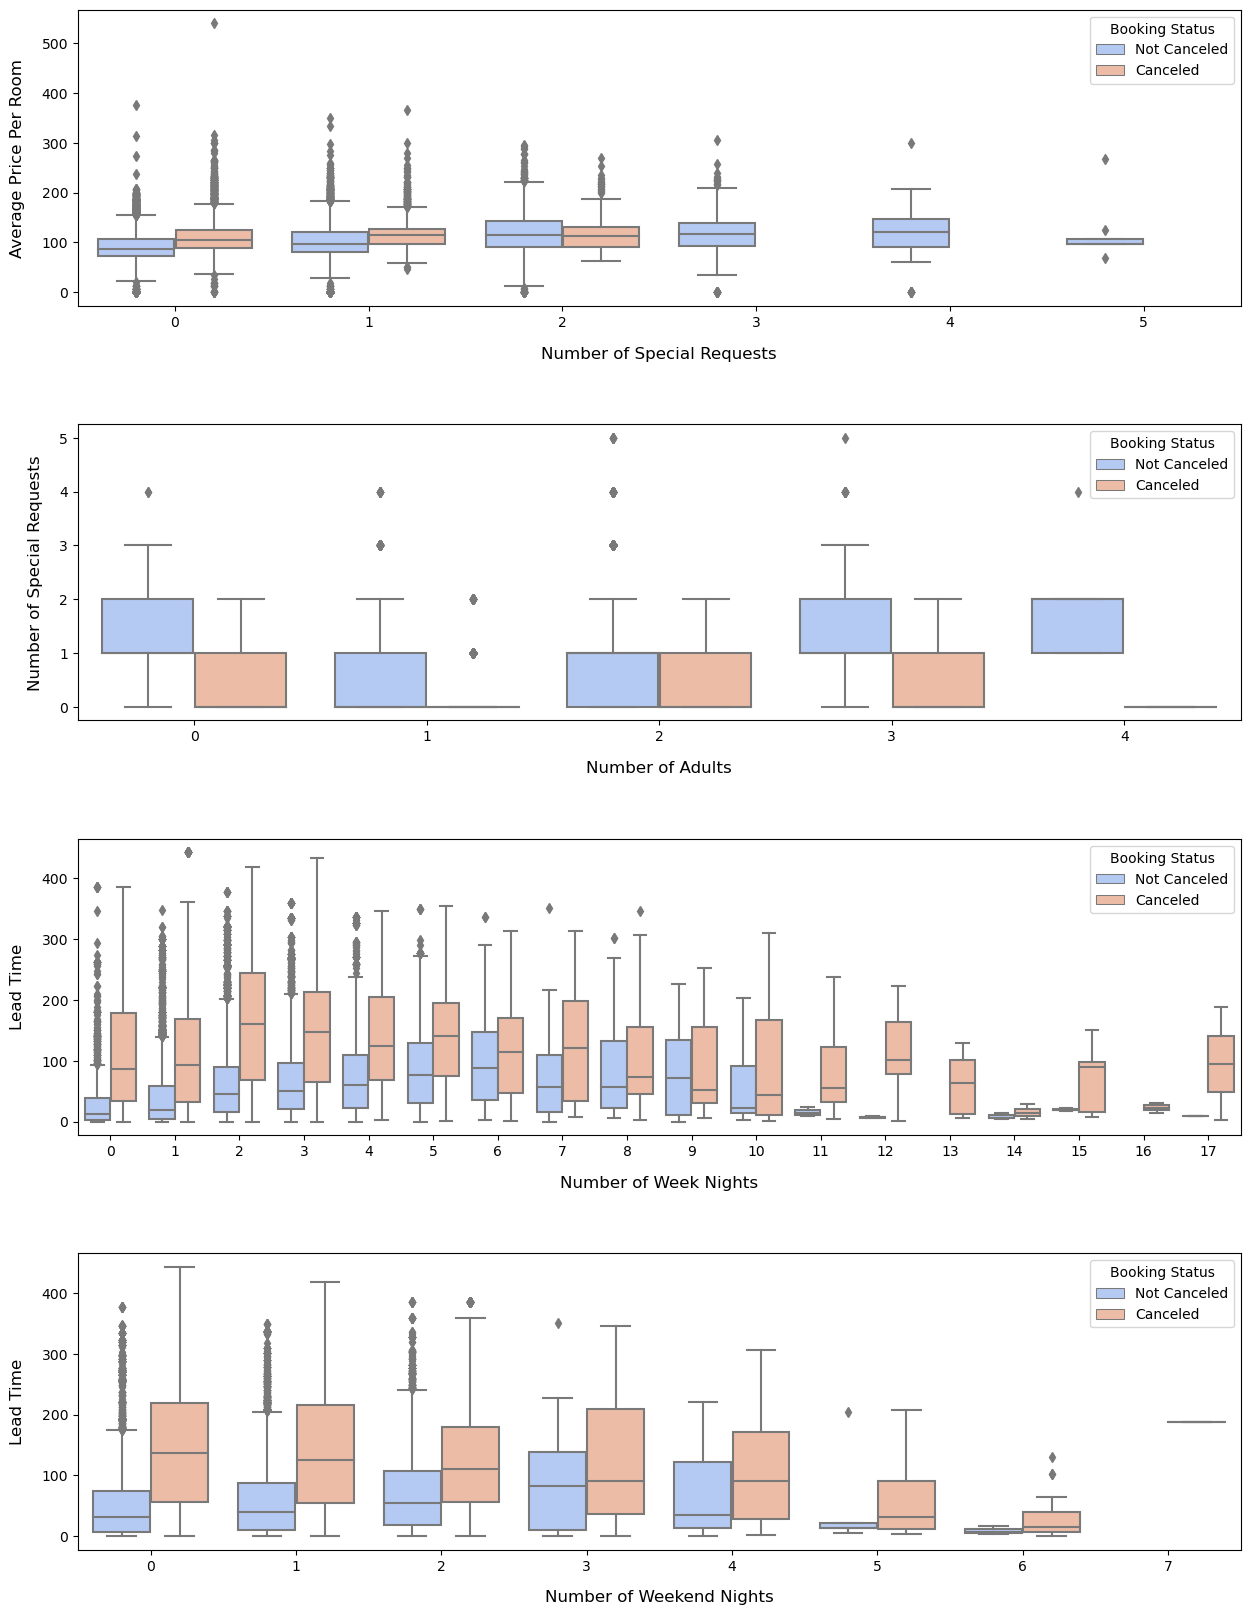

In [437]:
plt.figure(figsize = (15,20))

plt.subplot(4,1,1)
boxplot(x = 'no_of_special_requests',y = 'avg_price_per_room',xlabel = 'Number of Special Requests',ylabel = 'Average Price Per Room')

plt.subplot(4,1,2)
boxplot(x = 'no_of_adults',y = 'no_of_special_requests',xlabel = 'Number of Adults',ylabel = 'Number of Special Requests')

plt.subplot(4,1,3)
boxplot(x = 'no_of_week_nights',y = 'lead_time',xlabel = 'Number of Week Nights',ylabel = 'Lead Time')

plt.subplot(4,1,4)
boxplot(x = 'no_of_weekend_nights',y = 'lead_time',xlabel = 'Number of Weekend Nights',ylabel = 'Lead Time')

plt.subplots_adjust(wspace =0.4,hspace = 0.4)
plt.show()

## Creating Independent and Dependent Variables

In [460]:
x = df.drop('booking_status',axis = 1).values
y = df['booking_status'].values

### Label Encoder

In [458]:
from sklearn.preprocessing import LabelEncoder

In [459]:
le = LabelEncoder()
x[:,4] = le.fit_transform(x[:,4])
x[:,6] = le.fit_transform(x[:,6])
x[:,11] = le.fit_transform(x[:,11])

### Split the Data to Train and Test Sets

In [473]:
from sklearn.model_selection import train_test_split

In [474]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

### Scale X_train and X_test

In [500]:
from sklearn.preprocessing import StandardScaler

In [501]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Create XGBoost Model

In [476]:
from xgboost import XGBClassifier

In [502]:
xgb = XGBClassifier().fit(X_train,y_train)

### Grid Search

In [503]:
gridSearch = GridSearchCV(
    estimator = xgb,
    param_grid = {'n_estimators': [100, 500, 1000],'max_depth': [4, 5, 6],'learning_rate': [0.1, 0.01]},
    scoring='accuracy',
    cv=10,
    n_jobs=-1
)

In [504]:
gridSearch.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     callbacks=None, colsample_bylevel=1,
                                     colsample_bynode=1, colsample_bytree=1,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=-1,
                                     grow_policy='depthwise',
                                     importance_type=None,
                                     interaction_constraints='',
                                     learning_rate=0.30000001...bin=256,
                                     max_cat_threshold=64, max_cat_to_onehot=4,
                                     max_delta_step=0, max_depth=6,
                                     max_leaves=0, min_child_weight=1,
                                     missing=nan, monoton

In [537]:
print('Best Parameters\t:',gridSearch.best_params_)
print('Best Score\t:',round(gridSearch.best_score_,3))

Best Parameters	: {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 1000}
Best Score	: 0.896


In [506]:
xgb = XGBClassifier(learning_rate = 0.1, max_depth = 6, n_estimators = 1000).fit(X_train,y_train)
y_pred = xgb.predict(X_test)

## Calculate Scores

In [507]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

In [558]:
acc = round(accuracy_score(y_pred,y_test),3)
pre = round(precision_score(y_pred,y_test),3)
rec = round(recall_score(y_pred,y_test),3)
print(f'Accuracy Score\t: {acc}\nPrecision Score\t: {pre}\nRecall Score\t: {rec}')

Accuracy Score	: 0.895
Precision Score	: 0.936
Recall Score	: 0.911


In [552]:
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred),end='\n\n')
print('Classificaion Report'.center(70),'\n\n',classification_report(y_test,y_pred))

Confusion Matrix:
 [[2904  670]
 [ 469 6840]]

                         Classificaion Report                          

               precision    recall  f1-score   support

           0       0.86      0.81      0.84      3574
           1       0.91      0.94      0.92      7309

    accuracy                           0.90     10883
   macro avg       0.89      0.87      0.88     10883
weighted avg       0.89      0.90      0.89     10883

